# Tugas Besar IF2220 Probabilitas dan Statistika

## Penarikan Kesimpulan dan Pengujian Hipotesis

### Dibuat Oleh: <br> <br> 13521055 Muhammad Bangkit Dwi Cahyono <br> <br> 13521081 Bagas Aryo Seto

## Inisialisasi library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from IPython.display import Markdown, display
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

## 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
df = pd.read_csv('dataset/anggur.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [3]:
display(Markdown("#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, Skewness, dan Kurtosis"))
no1 = df

stat = pd.DataFrame()
stat["Mean"] = no1.mean()
stat["Median"] = no1.median()
stat["STD"] = no1.std()
stat["Var"] = no1.var()
stat["Range"] = no1.max() - no1.min()
stat["Min"] = no1.min()
stat["Max"] = no1.max()
stat["Q1"] = no1.quantile(0.25)
stat["Q2"] = no1.quantile(0.5)
stat["Q3"] = no1.quantile(0.75)
stat["IQR"] = stat["Q3"] - stat["Q1"]
stat["Skew"] = no1.skew()
stat["Kurt"] = no1.kurtosis()
display(stat)

#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, Skewness, dan Kurtosis

,Mean,Median,STD,Var,Range,Min,Max,Q1,Q2,Q3,IQR,Skew,Kurt
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,3.320000,11.490000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520838,0.524850,0.095848,0.009187,0.665200,0.139900,0.805100,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.116700,0.409600,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,0.032555,5.550755,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.015122,0.140758,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,0.194679,27.462525,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,3.150000,69.960000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.988800,1.002600,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,2.970000,3.710000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.290000,0.960000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


In [4]:
display(Markdown("#### Modus (multivalue)"))
display(no1.mode())

#### Modus (multivalue)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.54,0.5546,0.3019,0.032555,0.015122,0.194679,35.20,0.9959,3.34,0.59,9.86,8.0
1,NaN,NaN,NaN,0.033333,0.020794,0.621628,37.25,0.9961,NaN,NaN,10.31,NaN
2,NaN,NaN,NaN,0.051774,0.024259,0.860177,39.64,0.9965,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077156,0.027209,3.032139,40.61,0.9970,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.084744,0.032111,3.129885,41.05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,5.210260,0.131425,26.630490,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,5.217429,0.133656,26.665773,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,5.252864,0.135368,26.822626,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,5.299524,0.135790,27.006307,NaN,NaN,NaN,NaN,NaN,NaN


Dari tabel di atas terlihat bahwa ada beberapa atribut yang memiliki modus yang multivalue, sehingga tidak dapat langsung dicari modus dari masing-masing attributnya

In [5]:
display(Markdown("#### Modus (filtered)"))
modus_filtered = no1.mode()

# Drop NaN dan cek apakah dia multivalue atau bukan
modus_filtered = modus_filtered.apply(
    lambda x: 'multivalue' if len(x.dropna().unique()) > 1 else x[0])

display(modus_filtered)

#### Modus (filtered)

fixed acidity                 6.54
volatile acidity            0.5546
citric acid                 0.3019
residual sugar          multivalue
chlorides               multivalue
free sulfur dioxide     multivalue
total sulfur dioxide    multivalue
density                 multivalue
pH                            3.34
sulphates                     0.59
alcohol                 multivalue
quality                        8.0
dtype: object

In [6]:
display(Markdown("#### Hasil Akhir <br> <br> Mean, Median, Modus, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, Skewness, dan Kurtosis"))

new_cols = ['Mean', 'Median', 'Modus', 'STD', 'Var', 'Range', 'Min',
            'Max', 'Q1', 'Q2', 'Q3', 'IQR', 'Skew', 'Kurt']

stat["Modus"] = modus_filtered

stat = stat.reindex(columns=new_cols)
display(stat)

#### Hasil Akhir <br> <br> Mean, Median, Modus, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, Skewness, dan Kurtosis

,Mean,Median,Modus,STD,Var,Range,Min,Max,Q1,Q2,Q3,IQR,Skew,Kurt
fixed acidity,7.152530,7.150000,6.54,1.201598,1.443837,8.170000,3.320000,11.490000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520838,0.524850,0.5546,0.095848,0.009187,0.665200,0.139900,0.805100,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.3019,0.049098,0.002411,0.292900,0.116700,0.409600,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,multivalue,0.987915,0.975977,5.518200,0.032555,5.550755,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,multivalue,0.020111,0.000404,0.125635,0.015122,0.140758,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,multivalue,4.888100,23.893519,27.267847,0.194679,27.462525,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,multivalue,9.965767,99.316519,66.810000,3.150000,69.960000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,multivalue,0.002020,0.000004,0.013800,0.988800,1.002600,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,3.34,0.104875,0.010999,0.740000,2.970000,3.710000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.59,0.100819,0.010164,0.670000,0.290000,0.960000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


## 2. Visualisasi plot distribusi setiap kolom numerik.

In [7]:
def visualize_col(col):
    f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
    f.tight_layout()
    f.set_facecolor('white')

    ax1.hist(df[col])
    ax1.set(title='Histogram Kolom ' + col, xlabel = col, ylabel='frekuensi')
    ax1.grid()

    ax2.boxplot(df[col], showmeans=True)
    ax2.set(title='Boxplot Kolom ' + col, ylabel='frekuensi')
    ax2.grid()
    
    f.subplots_adjust(wspace=0.2)

    plt.show()

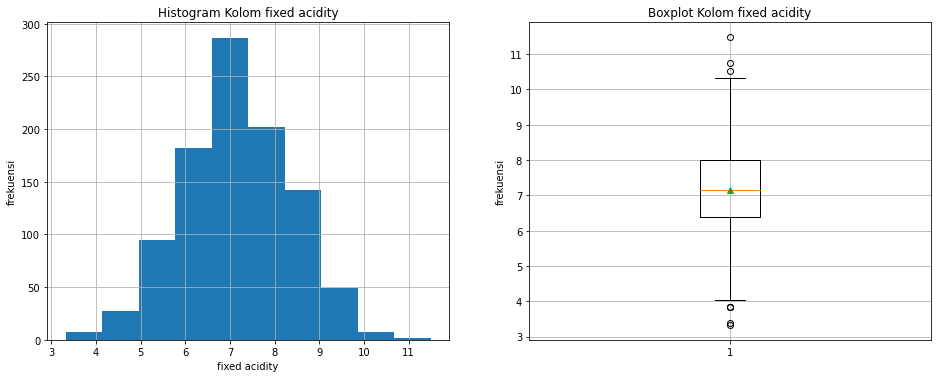

In [8]:
visualize_col('fixed acidity')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup kecil serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum atau lebih kecil dari titik minimum.

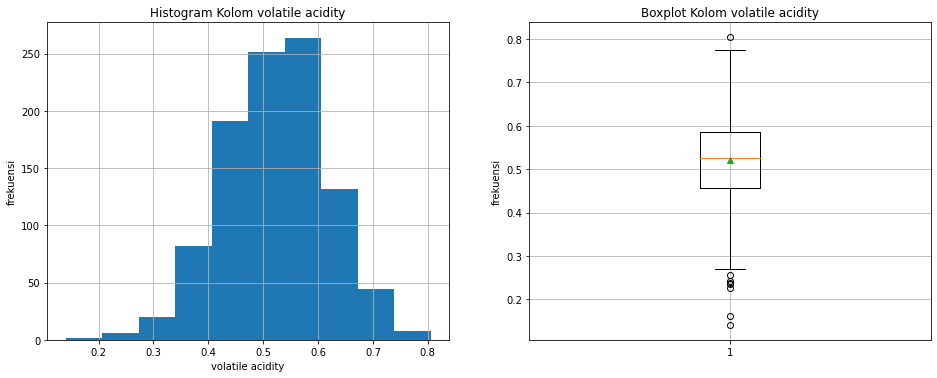

In [9]:
visualize_col('volatile acidity')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan sedikit condong ke kiri (_negatively skewed_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum sangat kecil serta terdapat sebuah *outlier* yang lebih besar dari titik maksimum dan beberapa *outlier* yang lebih kecil dari titik minimum.

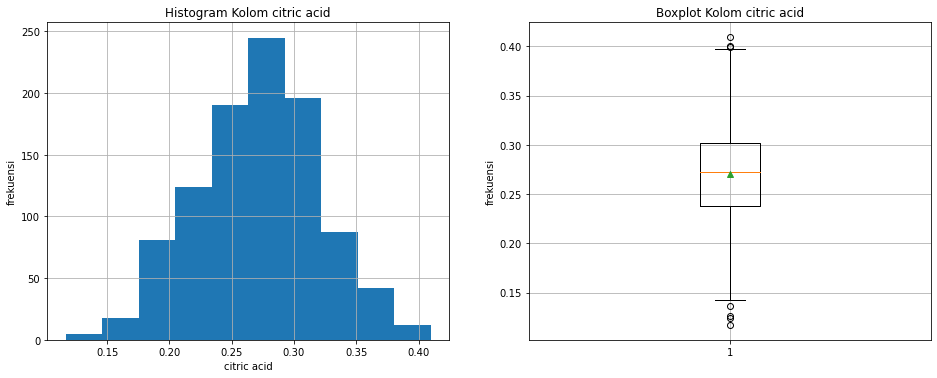

In [10]:
visualize_col('citric acid')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum sangat kecil serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum atau lebih kecil dari titik minimum.

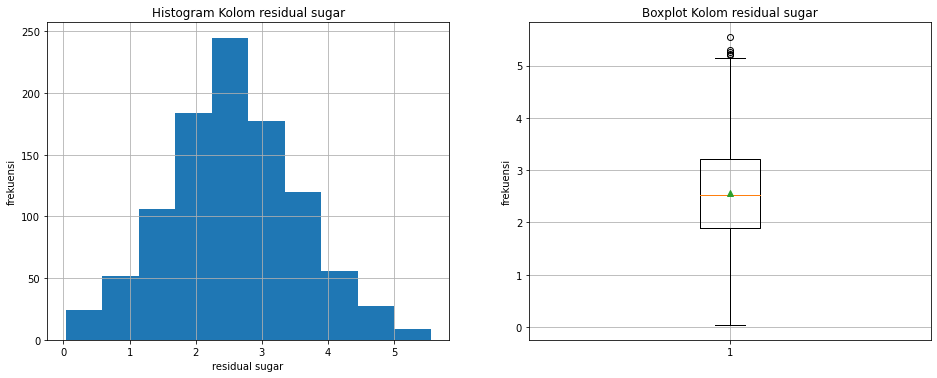

In [11]:
visualize_col('residual sugar')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan sedikit condong ke kanan (_positively skewed_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup kecil serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum.

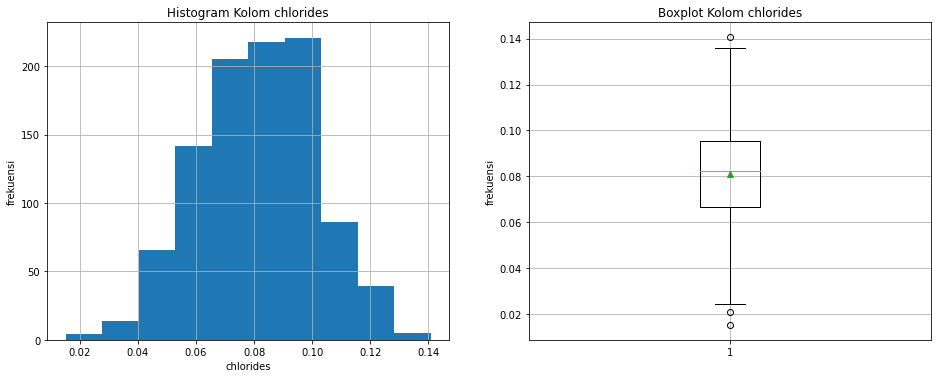

In [12]:
visualize_col('chlorides')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum sangat kecil serta terdapat sebuah *outlier* yang lebih besar dari titik maksimum dan dua buah *outlier* yang lebih kecil dari titik minimum.

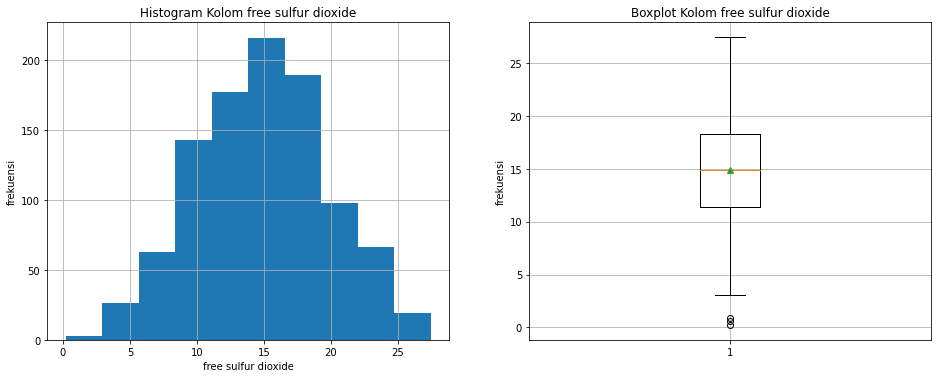

In [13]:
visualize_col('free sulfur dioxide')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram tidak terdistribusi secara normal (tidak _bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup kecil serta terdapat beberapa *outlier* yang lebih kecil dari titik minimum.

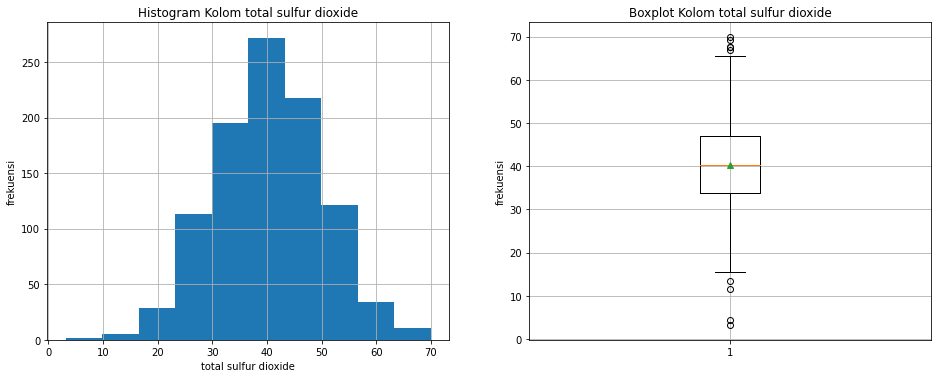

In [14]:
visualize_col('total sulfur dioxide')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup besar serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum atau lebih kecil dari titik minimum.

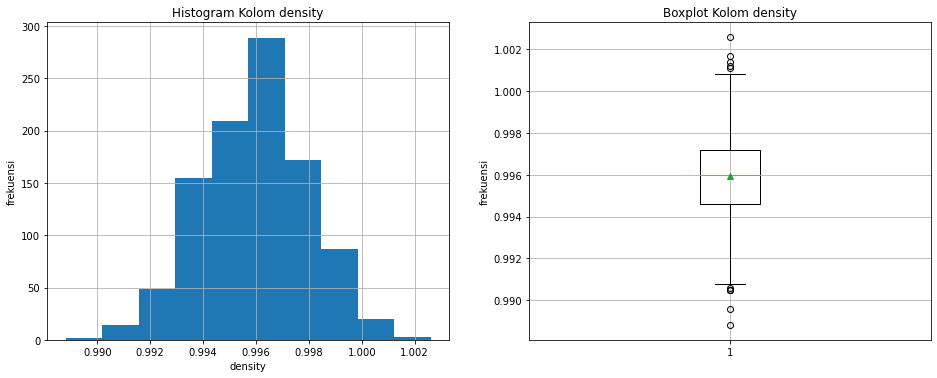

In [15]:
visualize_col('density')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup besar serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum atau lebih kecil dari titik minimum.

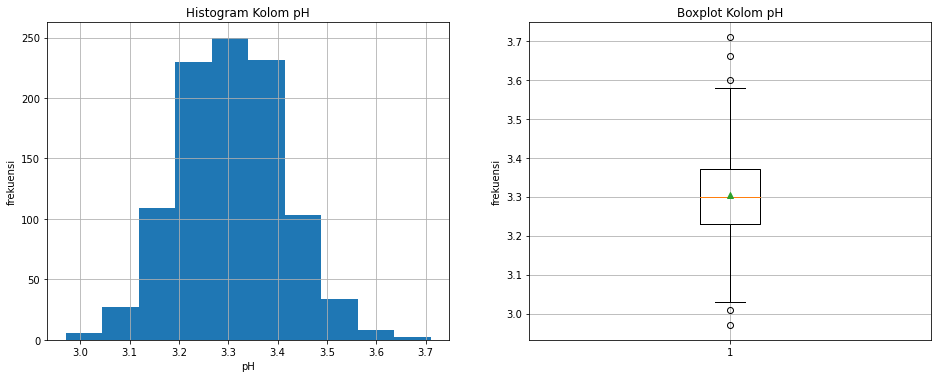

In [16]:
visualize_col('pH')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan sedikit condong ke kanan (_positively skewed_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum sangat kecil serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum atau lebih kecil dari titik minimum.

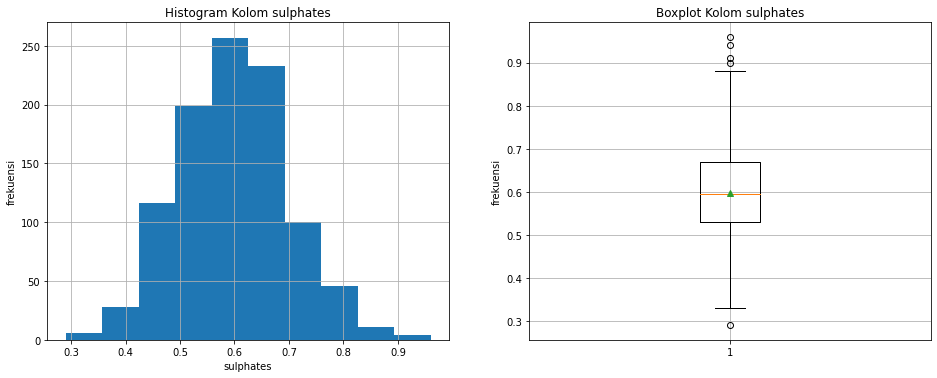

In [17]:
visualize_col('sulphates')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan sedikit condong ke kanan (_positively skewed_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum sangat kecil serta terdapat beberapa *outlier* yang lebih besar dari titik maksimum dan sebuah *outlier* yang lebih kecil dari titik minimum.

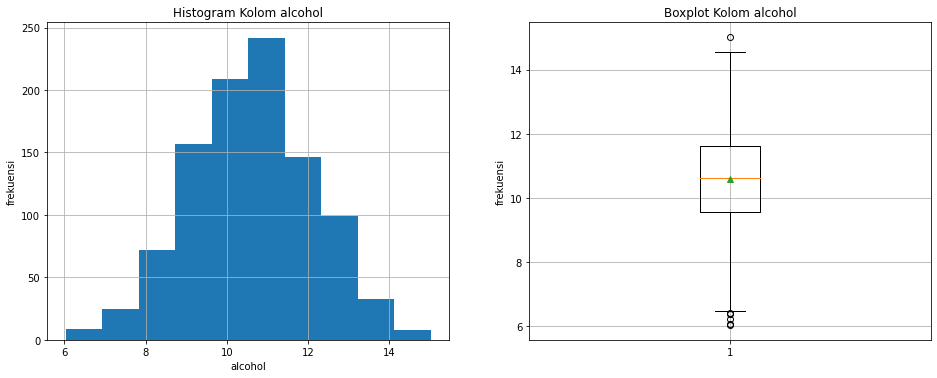

In [18]:
visualize_col('alcohol')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram terdistribusi secara normal (_bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup kecil serta terdapat sebuah *outlier* yang lebih besar dari titik maksimum dan beberapa *outlier* yang lebih kecil dari titik minimum.

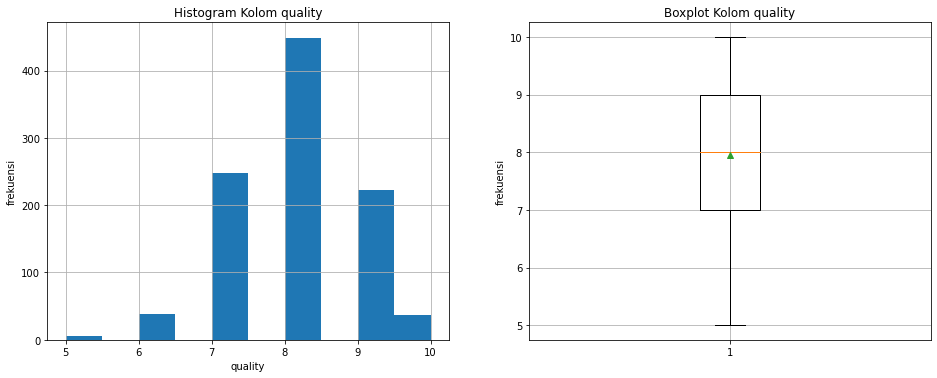

In [19]:
visualize_col('quality')

Berdasarkan histogram yang terbentuk, terlihat bahwa diagram tidak terdistribusi secara normal (tidak _bell shaped_) dan tidak condong ke kiri maupun ke kanan (_no skew_). Berdasarkan boxplot yang terbentuk, terlihat bahwa rentang antara titik maksimum dan titik minimum cukup kecil serta tidak terdapat *outlier*.

## 3. Normality Test Setiap Kolom Numerik.

In [20]:
def normality_test(col):
    z, pval = stats.shapiro(df[col])
    display(Markdown("Shapiro-Wilk Test"))
    display(Markdown("$p$ value = %.10f" % (pval)))
    if pval < 0.05:
        display(Markdown("kolom %s TIDAK berdistribusi normal" % (col)))
    else:
        display(Markdown("Kolom %s berdistribusi normal" % (col)))
    
    plt.figure(facecolor='white', figsize=(7,5))
    plt.hist(df[col], bins=50, density=True)
    plt.title('Histogram Data ' + col)
    plt.grid()


    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    ymed = (ymin + ymax) / 2
    mu, std = stats.norm.fit(df[col]) 
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)   

    plt.show()

Shapiro-Wilk Test

$p$ value = 0.8934295774

Kolom fixed acidity berdistribusi normal

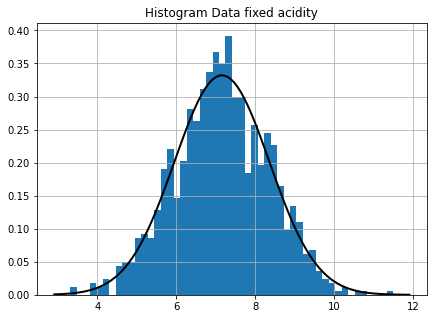

In [21]:
normality_test('fixed acidity')

Shapiro-Wilk Test

$p$ value = 0.0599096417

Kolom volatile acidity berdistribusi normal

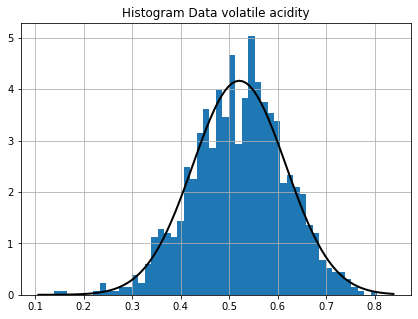

In [22]:
normality_test('volatile acidity')

Shapiro-Wilk Test

$p$ value = 0.2650147676

Kolom citric acid berdistribusi normal

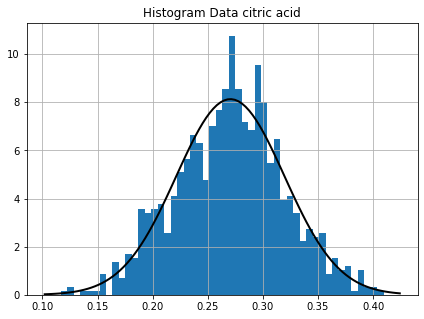

In [23]:
normality_test('citric acid')

Shapiro-Wilk Test

$p$ value = 0.0448811054

kolom residual sugar TIDAK berdistribusi normal

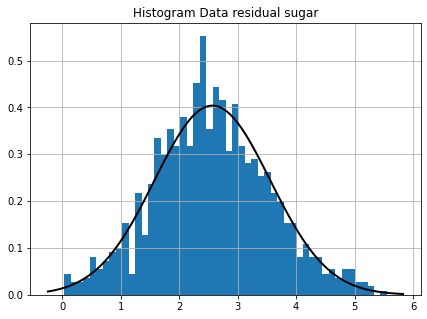

In [24]:
normality_test('residual sugar')

Shapiro-Wilk Test

$p$ value = 0.1740852594

Kolom chlorides berdistribusi normal

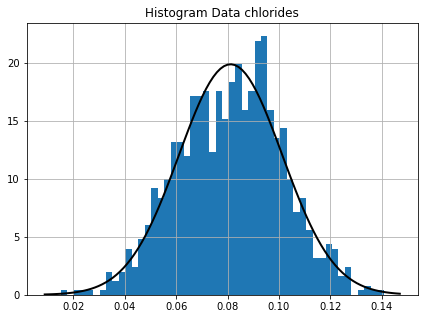

In [25]:
normality_test('chlorides')

Shapiro-Wilk Test

$p$ value = 0.0425107852

kolom free sulfur dioxide TIDAK berdistribusi normal

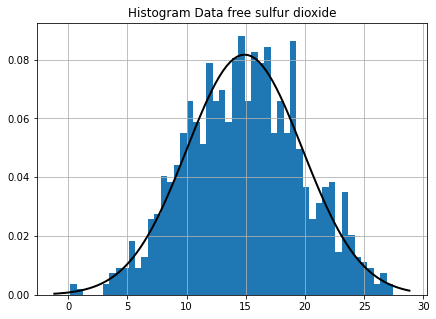

In [26]:
normality_test('free sulfur dioxide')

Shapiro-Wilk Test

$p$ value = 0.5371171832

Kolom total sulfur dioxide berdistribusi normal

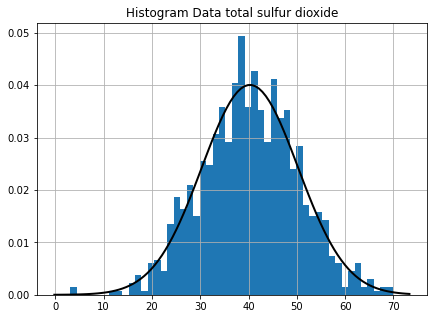

In [27]:
normality_test('total sulfur dioxide')

Shapiro-Wilk Test

$p$ value = 0.8527566791

Kolom density berdistribusi normal

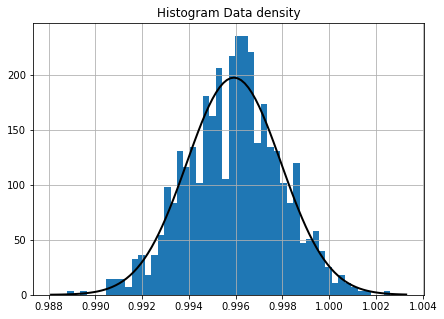

In [28]:
normality_test('density')

Shapiro-Wilk Test

$p$ value = 0.1374632716

Kolom pH berdistribusi normal

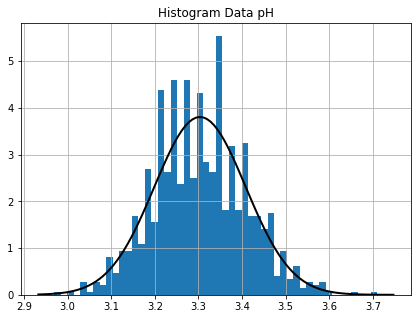

In [29]:
normality_test('pH')

Shapiro-Wilk Test

$p$ value = 0.1128375456

Kolom sulphates berdistribusi normal

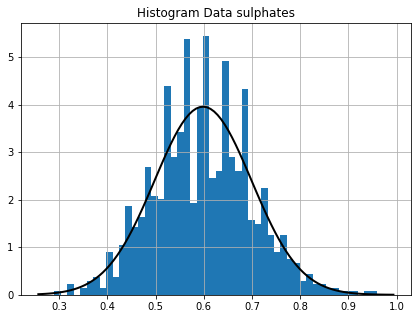

In [30]:
normality_test('sulphates')

Shapiro-Wilk Test

$p$ value = 0.5195288062

Kolom alcohol berdistribusi normal

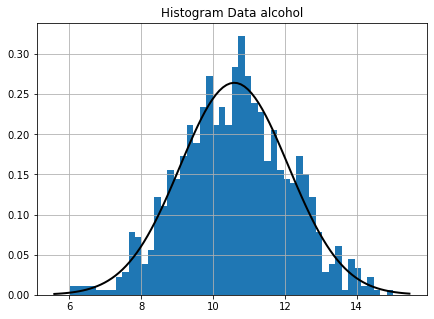

In [31]:
normality_test('alcohol')

Shapiro-Wilk Test

$p$ value = 0.0000000000

kolom quality TIDAK berdistribusi normal

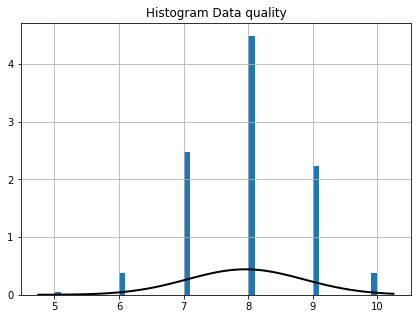

In [32]:
normality_test('quality')

## 4. Melakukan test hipotesis 1 sampel

### a. Nilai rata-rata pH di atas 3.29?

$H_0$: Nilai rata-rata pH sama dengan 3.29 ($μ = 3.29$)

$H_1$: Nilai rata-rata pH lebih dari 3.29 ($μ > 3.29$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Right Tailed Z Test dengan *Critical Section* $z > z_{\alpha}$

Rumus perhitungan nilai $z$ :

$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$

Jika $z$ berada pada *critical section* ($z > z_{\alpha}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($z ≤ z_{\alpha}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

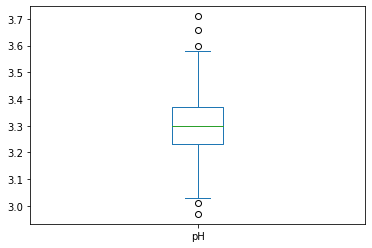

In [33]:
df["pH"].plot(kind="box")
plt.show()

In [34]:
miu_0 = 3.29
alpha = 0.05

z, p = ztest(df["pH"], value = miu_0, alternative = "larger")
display(Markdown(f"Didapat nilai $z = {round(z, 5)}$ dan $p = {round(p, 5)} $"))

z_alpha = stats.norm.ppf(1 - alpha)
display(Markdown(f"Didapat nilai $z_\\alpha = {round(z_alpha, 5)}$"))

display(Markdown("Hasil Keputusan: "))

if z > z_alpha:
    display(Markdown(f"Tolak $H_0$ karena $z$ berada pada *critical section* $z > z_\\alpha ({round(z, 5)} > {round(z_alpha, 5)}$)"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $z ≤ z_\\alpha ({round(z, 5)} ≤ {round(z_alpha, 5)}$)"))
    
display(Markdown("Tes Signifikan: "))

if p < alpha:
    display(Markdown(f"Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \\alpha  ({round(p, 5)} < {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata pH lebih dari ${miu_0}$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \\alpha ({round(p, 5)} ≥ {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata pH sama dengan ${miu_0}$"))


Didapat nilai $z = 4.10378$ dan $p = 2e-05 $

Didapat nilai $z_\alpha = 1.64485$

Hasil Keputusan: 

Tolak $H_0$ karena $z$ berada pada *critical section* $z > z_\alpha (4.10378 > 1.64485$)

Tes Signifikan: 

Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \alpha  (2e-05 < 0.05$)

Sehingga, nilai rata-rata pH lebih dari $3.29$

### b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

$H_0$: Nilai rata-rata Residual Sugar sama dengan 2.50 ($μ = 2.50$)

$H_1$: Nilai rata-rata Residual Sugar tidak sama dengan 2.50 ($μ ≠ 2.50$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$ :

$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

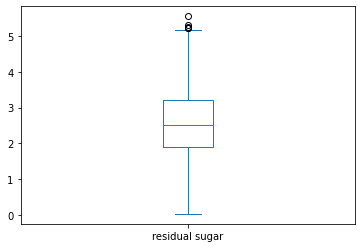

In [35]:
df["residual sugar"].plot(kind="box")
plt.show()

In [36]:
miu_0 = 2.50
alpha = 0.05

z, p = ztest(df["residual sugar"], value = miu_0, alternative = "two-sided")
display(Markdown(f"Didapat nilai $z = {round(z, 5)}$ dan $p = {round(p, 5)} $"))

z_half_alpha = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"Didapat nilai $z_{{\\alpha/2}} = {round(z_half_alpha, 5)}$"))

display(Markdown("Hasil Keputusan: "))

if z < -z_half_alpha or z > z_half_alpha:
    display(Markdown(f"Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_{{\\alpha/2}}$ atau $z > z_{{\\alpha/2}}$ $({round(z, 5)} < -{round(z_half_alpha, 5)}$ atau ${round(z, 5)} > {round(z_half_alpha, 5)})$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $-z_{{\\alpha/2}} ≤ z ≤ z_{{\\alpha/2}}$ $(-{round(z_half_alpha, 5)} ≤ {round(z, 5)} ≤ {round(z_half_alpha, 5)}$)"))
    
display(Markdown("Tes Signifikan: "))

if p < alpha:
    display(Markdown(f"Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \\alpha  ({round(p, 5)} < {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata Residual Sugar tidak sama dengan ${miu_0}$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \\alpha ({round(p, 5)} ≥ {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata Residual Sugar sama dengan ${miu_0}$"))

Didapat nilai $z = 2.14796$ dan $p = 0.03172 $

Didapat nilai $z_{\alpha/2} = 1.95996$

Hasil Keputusan: 

Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$ $(2.14796 < -1.95996$ atau $2.14796 > 1.95996)$

Tes Signifikan: 

Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \alpha  (0.03172 < 0.05$)

Sehingga, nilai rata-rata Residual Sugar tidak sama dengan $2.5$

### c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

$H_0$: Nilai rata-rata sulphates sama dengan 0.65 ($μ = 0.65$)

$H_1$: Nilai rata-rata Residual Sugar tidak sama dengan 0.65 ($μ ≠ 0.65$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$ :

$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

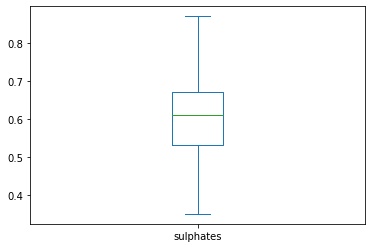

In [37]:
df["sulphates"].head(150).plot(kind="box")
plt.show()

In [38]:
miu_0 = 0.65
alpha = 0.05

z, p = ztest(df["sulphates"].head(150), value = miu_0, alternative = "two-sided")
display(Markdown(f"Didapat nilai $z = {round(z, 5)}$ dan $p = {round(p, 5)} $"))

z_half_alpha = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"Didapat nilai $z_{{\\alpha/2}} = {round(z_half_alpha, 5)}$"))

display(Markdown("Hasil Keputusan: "))

if z < -z_half_alpha or z > z_half_alpha:
    display(Markdown(f"Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_{{\\alpha/2}}$ atau $z > z_{{\\alpha/2}}$ $({round(z, 5)} < -{round(z_half_alpha, 5)}$ atau ${round(z, 5)} > {round(z_half_alpha, 5)})$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $-z_{{\\alpha/2}} ≤ z ≤ z_{{\\alpha/2}}$ $(-{round(z_half_alpha, 5)} ≤ {round(z, 5)} ≤ {round(z_half_alpha, 5)}$)"))
    
display(Markdown("Tes Signifikan: "))

if p < alpha:
    display(Markdown(f"Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \\alpha  ({round(p, 5)} < {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata 150 baris pertama kolom sulphates tidak sama dengan ${miu_0}$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \\alpha ({round(p, 5)} ≥ {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata 150 baris pertama kolom sulphates sama dengan ${miu_0}$"))

Didapat nilai $z = -4.96484$ dan $p = 0.0 $

Didapat nilai $z_{\alpha/2} = 1.95996$

Hasil Keputusan: 

Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$ $(-4.96484 < -1.95996$ atau $-4.96484 > 1.95996)$

Tes Signifikan: 

Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \alpha  (0.0 < 0.05$)

Sehingga, nilai rata-rata 150 baris pertama kolom sulphates tidak sama dengan $0.65$

### d. Nilai rata-rata total sulfur dioxide di bawah 35?

$H_0$: Nilai rata-rata total sulfur dioxide sama dengan 35 ($μ = 35$)

$H_1$: Nilai rata-rata total sulfur dioxide kurang dari 35 ($μ < 35$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Left Tailed Z Test dengan *Critical Section* $z < z_{\alpha}$

Rumus perhitungan nilai $z$ :

$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$

Jika $z$ berada pada *critical section* ($z < z_{\alpha}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($z ≥ z_{\alpha}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

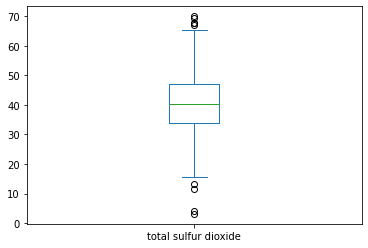

In [39]:
df["total sulfur dioxide"].plot(kind="box")
plt.show()

In [40]:
miu_0 = 35
alpha = 0.05

z, p = ztest(df["total sulfur dioxide"], value = miu_0, alternative = "smaller")
display(Markdown(f"Didapat nilai $z = {round(z, 5)}$ dan $p = {round(p, 5)} $"))

z_alpha = stats.norm.ppf(1 - alpha)
display(Markdown(f"Didapat nilai $z_\\alpha = {round(z_alpha, 5)}$"))

display(Markdown("Hasil Keputusan: "))

if z < -z_alpha:
    display(Markdown(f"Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_\\alpha ({round(z, 5)} < {-round(z_alpha, 5)}$)"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $z ≥ -z_\\alpha ({round(z, 5)} ≥ {-round(z_alpha, 5)}$)"))
    
display(Markdown("Tes Signifikan: "))

if p < alpha:
    display(Markdown(f"Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \\alpha  ({round(p, 5)} < {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata total sulfur dioxide kurang dari ${miu_0}$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \\alpha ({round(p, 5)} ≥ {alpha}$)"))
    display(Markdown(f"Sehingga, nilai rata-rata total sulfur dioxide sama dengan ${miu_0}$"))

Didapat nilai $z = 16.78639$ dan $p = 1.0 $

Didapat nilai $z_\alpha = 1.64485$

Hasil Keputusan: 

Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $z ≥ -z_\alpha (16.78639 ≥ -1.64485$)

Tes Signifikan: 

Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \alpha (1.0 ≥ 0.05$)

Sehingga, nilai rata-rata total sulfur dioxide sama dengan $35$

### e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

$H_0$: Persentase nilai total sulfat dioxide sama dengan $50\%$ ($p_{0} = 0.5$)

$H_1$: Persentase nilai total sulfat dioxied tidak sama dengan $50\%$ ($p_{0} ≠ 0.5$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Two Tailed One Proportion Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$ :

$$ z = \frac{\hat{p} - \hat{p_{0}}} {\sqrt{\frac{p_{0} q_{0}} {n}}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

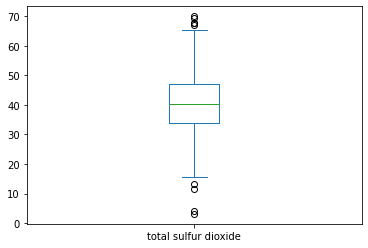

In [41]:
df["total sulfur dioxide"].plot(kind="box")
plt.show()

In [42]:
p_0 = 0.50
alpha = 0.05

res = df[df["total sulfur dioxide"] > 40]

z, p = proportions_ztest(len(res), len(df), value = p_0, alternative = "two-sided", prop_var=p_0)
display(Markdown(f"Didapat nilai $z = {round(z, 5)}$ dan $p = {round(p, 5)} $"))

z_half_alpha = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"Didapat nilai $z_{{\\alpha/2}} = {round(z_half_alpha, 5)}$"))

display(Markdown("Hasil Keputusan: "))

if z < -z_half_alpha or z > z_half_alpha:
    display(Markdown(f"Tolak $H_0$ karena $z$ berada pada *critical section* $z < -z_{{\\alpha/2}}$ atau $z > z_{{\\alpha/2}}$ $({round(z, 5)} < -{round(z_half_alpha, 5)}$ atau ${round(z, 5)} > {round(z_half_alpha, 5)})$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $-z_{{\\alpha/2}} ≤ z ≤ z_{{\\alpha/2}}$ $(-{round(z_half_alpha, 5)} ≤ {round(z, 5)} ≤ {round(z_half_alpha, 5)}$)"))
    
display(Markdown("Tes Signifikan: "))

if p < alpha:
    display(Markdown(f"Tolak $H_0$ karena $p$ lebih kecil dari tingkat signifikan yang diinginikan $p < \\alpha  ({round(p, 5)} < {alpha}$)"))
    display(Markdown(f"Sehingga, persentase nilai total Sulfur Dioxide yang lebih dari 40, adalah tidak sama dengan ${p_0}$"))
else:
    display(Markdown(f"Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \\alpha ({round(p, 5)} ≥ {alpha}$)"))
    display(Markdown(f"Sehingga, persentase nilai total Sulfur Dioxide yang lebih dari 40, adalah sama dengan ${p_0}$"))

Didapat nilai $z = 0.75895$ dan $p = 0.44788 $

Didapat nilai $z_{\alpha/2} = 1.95996$

Hasil Keputusan: 

Tidak tolak $H_0$ karena $z$ tidak berada pada *critical section* $-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$ $(-1.95996 ≤ 0.75895 ≤ 1.95996$)

Tes Signifikan: 

Tidak tolak $H_0$ karena $p$ lebih besar atau sama dengan dari tingkat signifikan yang diinginikan $p ≥ \alpha (0.44788 ≥ 0.05$)

Sehingga, persentase nilai total Sulfur Dioxide yang lebih dari 40, adalah sama dengan $0.5$

## 5. Test Hipotesis 2 Sampel

### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

$H_0$: Nilai rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity ($μ_{1} - μ_{2} = 0$)

$H_1$: Nilai rata-rata kolom awal fixed acidity tidak sama dengan nilai rata-rata kolom akhir fixed acidity ($μ_{1} - μ_{2} ≠ 0$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Double Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$:

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - (μ_{1} - μ_{2})} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ diterima

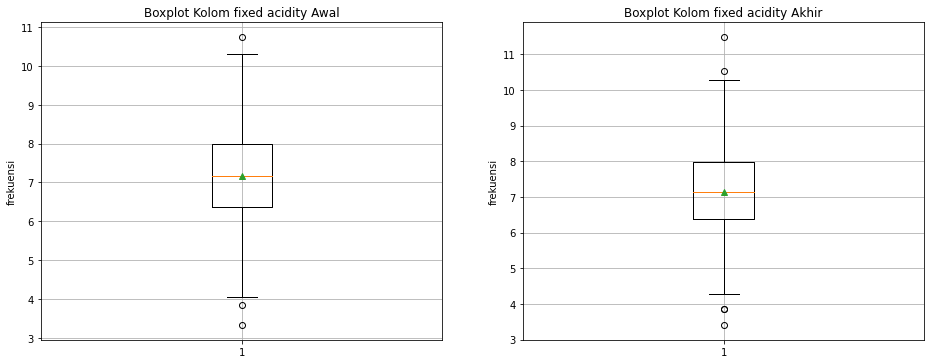

Didapatkan nilai:

$z = 0.026$

$p = 0.9792$

$z_{\alpha/2} = 1.96$

$z$ tidak berada pada *critical section* ($-1.96 ≤ z ≤ 1.96$)

$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Keputusan: Terima $H_0$

Jadi, nilai rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity ($μ_{1} - μ_{2} = 0$)

In [43]:
# PLot box kedua sampel
f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
f.tight_layout()
f.set_facecolor('white')

fa = df["fixed acidity"][:len(df) // 2]
fb = df["fixed acidity"][len(df) // 2:]

ax1.boxplot(fa, showmeans=True)
ax1.set(title='Boxplot Kolom fixed acidity Awal', ylabel='frekuensi')
ax1.grid()

ax2.boxplot(fb, showmeans=True)
ax2.set(title='Boxplot Kolom fixed acidity Akhir', ylabel='frekuensi')
ax2.grid()

f.subplots_adjust(wspace=0.2)
plt.show()

# uji hipotesis sampel        
delta_miu = 0
alpha = 0.05

z, p = ztest(fa, fb, value=delta_miu, alternative="two-sided")
display(Markdown("Didapatkan nilai:"))
display(Markdown(f"$z = {round(z, 4)}$"))
display(Markdown(f"$p = {round(p, 4)}$"))

z_alpha_per_dua = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"$z_{{\\alpha/2}} = {round(z_alpha_per_dua, 4)}$"))

if z < -z_alpha_per_dua or z > z_alpha_per_dua:
    display(Markdown(f"$z$ berada pada *critical section* ($z < {round(-z_alpha_per_dua, 4)}$ atau $z > {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Keputusan: Tolak $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal fixed acidity tidak sama dengan nilai rata-rata kolom akhir fixed acidity ($μ_{{1}} - μ_{{2}} ≠ {delta_miu}$)"))
else:
    display(Markdown(f"$z$ tidak berada pada *critical section* (${round(-z_alpha_per_dua, 4)} ≤ z ≤ {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Keputusan: Terima $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal fixed acidity sama dengan nilai rata-rata kolom akhir fixed acidity ($μ_{{1}} - μ_{{2}} = {delta_miu}$)"))

## b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

$H_0$: Perbedaan nilai rata-rata kolom awal chlorides dengan nilai rata-rata kolom akhir chlorides sama dengan 0.001 ($μ_{1} - μ_{2} = 0.001$)

$H_1$: Perbedaan nilai rata-rata kolom awal chlorides dengan nilai rata-rata kolom akhir chlorides tidak sama dengan 0.001 ($μ_{1} - μ_{2} ≠ 0.001$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Double Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$:

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - (μ_{1} - μ_{2})} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ diterima

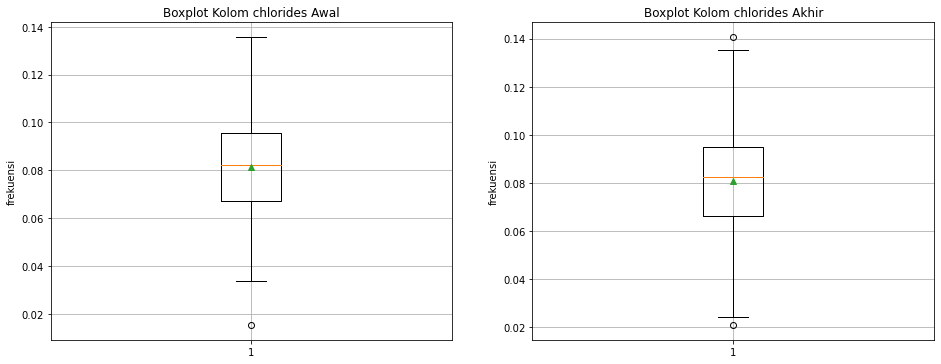

Didapatkan nilai:

$z = -0.4673$

$p = 0.6403$

$z_{\alpha/2} = 1.96$

$z$ tidak berada pada *critical section* ($-1.96 ≤ z ≤ 1.96$)

$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Keputusan: Terima $H_0$

Jadi, nilai rata-rata kolom awal chlorides lebih besar dari nilai rata-rata kolom akhir chlorides sebesar 0.001 ($μ_{1} - μ_{2} = 0.001$)

In [44]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
f.tight_layout()
f.set_facecolor('white')

fa = df["chlorides"][:len(df) // 2]
fb = df["chlorides"][len(df) // 2:]

ax1.boxplot(fa, showmeans=True)
ax1.set(title='Boxplot Kolom chlorides Awal', ylabel='frekuensi')
ax1.grid()

ax2.boxplot(fb, showmeans=True)
ax2.set(title='Boxplot Kolom chlorides Akhir', ylabel='frekuensi')
ax2.grid()

f.subplots_adjust(wspace=0.2)
plt.show()


delta_miu = 0.001
alpha = 0.05

z, p = ztest(fa, fb, value=delta_miu, alternative="two-sided")
display(Markdown("Didapatkan nilai:"))
display(Markdown(f"$z = {round(z, 4)}$"))
display(Markdown(f"$p = {round(p, 4)}$"))

z_alpha_per_dua = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"$z_{{\\alpha/2}} = {round(z_alpha_per_dua, 4)}$"))

if z < -z_alpha_per_dua or z > z_alpha_per_dua:
    display(Markdown(f"$z$ berada pada *critical section* ($z < {round(-z_alpha_per_dua, 4)}$ atau $z > {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Keputusan: Tolak $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal chlorides tidak lebih besar dari nilai rata-rata kolom akhir chlorides sebesar {delta_miu} ($μ_{{1}} - μ_{{2}} ≠ {delta_miu}$)"))
else:
    display(Markdown(f"$z$ tidak berada pada *critical section* (${round(-z_alpha_per_dua, 4)} ≤ z ≤ {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Keputusan: Terima $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal chlorides lebih besar dari nilai rata-rata kolom akhir chlorides sebesar {delta_miu} ($μ_{{1}} - μ_{{2}} = {delta_miu}$)"))

## c. Benarkah rata-rata sampel 25 baris pertama kolom volatile acidity sama dengan rata-rata 25 baris pertama kolom sulphates

$H_0$: Nilai rata-rata 25 baris pertama kolom volatile acidity sama dengan nilai rata-rata 25 baris pertama kolom sulphates ($μ_{1} - μ_{2} = 0$)

$H_1$: Nilai rata-rata 25 baris pertama kolom volatile acidity tidak sama dengan nilai rata-rata 25 baris pertama kolom sulphates ($μ_{1} - μ_{2} ≠ 0$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Double Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$:

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - (μ_{1} - μ_{2})} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($-z_{\alpha/2} ≤ z ≤ z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ diterima

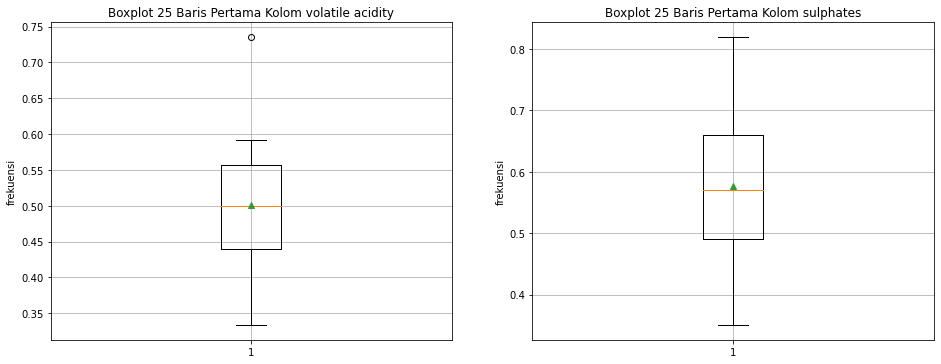

Didapatkan nilai:

$z = -2.6375$

$p = 0.0084$

$z_{\alpha/2} = 1.96$

$z$ berada pada *critical section* ($z < -1.96$ atau $z > 1.96$)

$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < 0.05$)

Keputusan: Tolak $H_0$

Jadi, nilai rata-rata 25 baris pertama kolom volatile acidity tidak sama dengan nilai rata-rata 25 baris pertama kolom sulphates ($μ_{1} - μ_{2} ≠ 0$)

In [45]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
f.tight_layout()
f.set_facecolor('white')

fa = df['volatile acidity'][:25]
fb = df['sulphates'][:25]

ax1.boxplot(fa, showmeans=True)
ax1.set(title='Boxplot 25 Baris Pertama Kolom volatile acidity', ylabel='frekuensi')
ax1.grid()

ax2.boxplot(fb, showmeans=True)
ax2.set(title='Boxplot 25 Baris Pertama Kolom sulphates', ylabel='frekuensi')
ax2.grid()

f.subplots_adjust(wspace=0.2)
plt.show()


delta_miu = 0
alpha = 0.05

z, p = ztest(fa, fb, value=delta_miu, alternative="two-sided")
display(Markdown("Didapatkan nilai:"))
display(Markdown(f"$z = {round(z, 4)}$"))
display(Markdown(f"$p = {round(p, 4)}$"))

z_alpha_per_dua = stats.norm.ppf(1 - alpha / 2)
display(Markdown(f"$z_{{\\alpha/2}} = {round(z_alpha_per_dua, 4)}$"))

if z < -z_alpha_per_dua or z > z_alpha_per_dua:
    display(Markdown(f"$z$ berada pada *critical section* ($z < {round(-z_alpha_per_dua, 4)}$ atau $z > {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Keputusan: Tolak $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata 25 baris pertama kolom volatile acidity tidak sama dengan nilai rata-rata 25 baris pertama kolom sulphates ($μ_{{1}} - μ_{{2}} ≠ {delta_miu}$)"))
else:
    display(Markdown(f"$z$ tidak berada pada *critical section* (${round(-z_alpha_per_dua, 4)} ≤ z ≤ {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Keputusan: Terima $H_0$"))
    display(Markdown(f"Jadi, nilai rata-rata 25 baris pertama kolom volatile acidity sama dengan nilai rata-rata 25 baris pertama kolom sulphates ($μ_{{1}} - μ_{{2}} = {delta_miu}$)"))

## d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

$H_0$: Variansi pada bagian awal kolom residual sugar sama dengan variansi pada bagian akhir kolom residual sugar (${\sigma_{1}}^{2} = {\sigma_{2}}^{2}$)

$H_1$: Variansi pada bagian awal kolom residual sugar tidak sama dengan variansi pada bagian akhir kolom residual sugar (${\sigma_{1}}^{2} ≠ {\sigma_{2}}^{2}$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Double Sample Two Tailed F Test dengan *Critical Section* $f < f_{1 - \alpha / 2} (v_1, v_2)$ atau $f > f_{\alpha / 2} (v_1, v_2)$ dengan $v_1 = n_1 - 1$ dan $v_2 = n_2 - 1$

Rumus perhitungan nilai $f$:

$$ f = \frac{s_{1}^{2}}{s_{2}^{2}} $$

Jika $f$ berada pada *critical section* ($f < f_{1 - \alpha / 2} (v_1, v_2)$ atau $f > f_{\alpha / 2} (v_1, v_2)$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $f$ tidak berada pada *critical section* ($f_{1 - \alpha / 2} (v_1, v_2) ≤ f ≤ f_{\alpha / 2} (v_1, v_2)$), maka nilai $p ≥ \alpha$ dan $H_0$ diterima

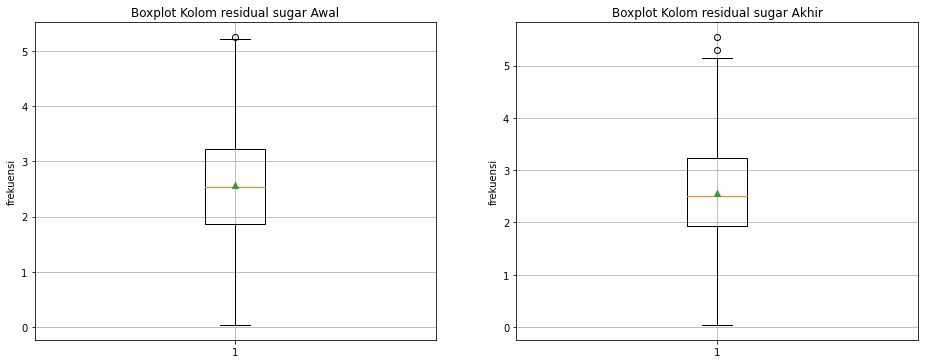

Didapatkan nilai:

$z = -2.6375$

$p = 0.7476$

$f_{1 - \alpha / 2} (v_1, v_2) = 0.8389$

$f_{\alpha / 2} (v_1, v_2) = 1.1921$

$f$ tidak berada pada *critical section* ($ 0.8389 ≤ f ≤ 1.1921$)

$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Keputusan: Terima $H_0$

Jadi, variansi pada bagian awal kolom residual sugar sama dengan variansi pada bagian akhir kolom residual sugar ($𝜎_1^2 = 𝜎_2^2$)

In [46]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
f.tight_layout()
f.set_facecolor('white')

fa = df['residual sugar'][:len(df) // 2]
fb = df['residual sugar'][len(df) // 2:]

ax1.boxplot(fa, showmeans=True)
ax1.set(title='Boxplot Kolom residual sugar Awal', ylabel='frekuensi')
ax1.grid()

ax2.boxplot(fb, showmeans=True)
ax2.set(title='Boxplot Kolom residual sugar Akhir', ylabel='frekuensi')
ax2.grid()

f.subplots_adjust(wspace=0.2)
plt.show()

alpha = 0.05
v_1 = len(df[:len(df) // 2]) - 1
v_2 = len(df[len(df) // 2:]) - 1

f = fa.var() / fb.var()
p = 1 - stats.f.cdf(f, v_1, v_2)
display(Markdown("Didapatkan nilai:"))
display(Markdown(f"$z = {round(z, 4)}$"))
display(Markdown(f"$p = {round(p, 4)}$"))

f_lower = stats.f.ppf(alpha / 2, v_1, v_2)
f_upper = stats.f.ppf(1 - alpha / 2, v_1, v_2)
display(Markdown(f"$f_{{1 - \\alpha / 2}} (v_1, v_2) = {round(f_lower, 4)}$"))
display(Markdown(f"$f_{{\\alpha / 2}} (v_1, v_2) = {round(f_upper, 4)}$"))

if f < f_lower or f > f_upper:
    display(Markdown(f"$f$ berada pada *critical section* ($f < {round(f_lower, 4)}$ atau $f > {round(f_upper, 4)}$)"))
    display(Markdown(f"$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Keputusan: Tolak $H_0$"))
    display(Markdown(f"Jadi, variansi pada bagian awal kolom residual sugar tidak sama dengan variansi pada bagian akhir kolom residual sugar ($𝜎_{1}^{2} ≠ 𝜎_{2}^{2}$)"))
else:
    display(Markdown(f"$f$ tidak berada pada *critical section* ($ {round(f_lower, 4)} ≤ f ≤ {round(f_upper, 4)}$)"))
    display(Markdown(f"$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Keputusan: Terima $H_0$"))
    display(Markdown(f"Jadi, variansi pada bagian awal kolom residual sugar sama dengan variansi pada bagian akhir kolom residual sugar ($𝜎_{1}^{2} = 𝜎_{2}^{2}$)"))

## e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

$H_0$: Proporsi nilai bagian awal alcohol yang lebih dari 7 sama besar dengan proporsi nilai yang sama pada di bagian akhir alcohol ($p_{1} - p_{2} = 0$)

$H_1$: Proporsi nilai bagian awal alcohol yang lebih dari 7 lebih besar dengan proporsi nilai yang sama pada di bagian akhir alcohol ($p_{1} - p_{2} > 0$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Right Tailed One Proportion Z Test dengan *Critical Section* $z > z_\alpha$

Rumus perhitungan nilai $z$:

$$ z = \frac{\hat{p_{1}} - \hat{p_{2}}} {\sqrt{\hat{p}\hat{q}(1/n_{1} + 1/n_{2})}} $$

Jika $z$ berada pada *critical section* ($z > z_\alpha$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($z ≤ z_\alpha$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

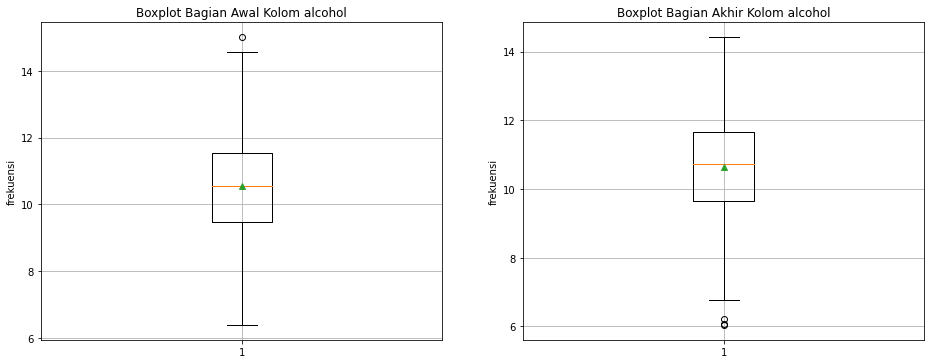

Didapatkan nilai:

$z = 0.0$

$p = 0.5$

$z_{\alpha} = 1.6449$

$z$ tidak berada pada *critical section* ($z ≤ 1.6449$)

$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Keputusan: Terima $H_0$

Jadi, proporsi nilai bagian awal alcohol yang lebih dari 7 sama besar dengan proporsi nilai yang sama pada di bagian akhir alcohol ($p_{1} - p_{2} = 0$)

In [47]:
f, [ax1, ax2] = plt.subplots(1,2,figsize=(13,5))
f.tight_layout()
f.set_facecolor('white')

fa = df['alcohol'][:len(df) // 2]
fb = df['alcohol'][len(df) // 2:]

ax1.boxplot(fa, showmeans=True)
ax1.set(title='Boxplot Bagian Awal Kolom alcohol', ylabel='frekuensi')
ax1.grid()

ax2.boxplot(fb, showmeans=True)
ax2.set(title='Boxplot Bagian Akhir Kolom alcohol', ylabel='frekuensi')
ax2.grid()

f.subplots_adjust(wspace=0.2)
plt.show()


delta_p = 0
alpha = 0.05

z, p = proportions_ztest([len(fa[fa > 7]), len(fb[fb > 7])], [len(fa), len(fb)], value=delta_p, alternative="larger")
display(Markdown("Didapatkan nilai:"))
display(Markdown(f"$z = {round(z, 4)}$"))
display(Markdown(f"$p = {round(p, 4)}$"))

z_alpha = stats.norm.ppf(1 - alpha)
display(Markdown(f"$z_{{\\alpha}} = {round(z_alpha, 4)}$"))

if z > z_alpha:
    display(Markdown(f"$z$ berada pada *critical section* ($z > {round(z_alpha, 4)}$)"))
    display(Markdown(f"$p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Keputusan: Tolak $H_0$"))
    display(Markdown(f"Jadi, proporsi nilai bagian awal alcohol yang lebih dari 7 lebih besar dengan proporsi nilai yang sama pada di bagian akhir alcohol ($p_{{1}} - p_{{2}} > {delta_p}$)"))
else:
    display(Markdown(f"$z$ tidak berada pada *critical section* ($z ≤ {round(z_alpha, 4)}$)"))
    display(Markdown(f"$p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Keputusan: Terima $H_0$"))
    display(Markdown(f"Jadi, proporsi nilai bagian awal alcohol yang lebih dari 7 sama besar dengan proporsi nilai yang sama pada di bagian akhir alcohol ($p_{{1}} - p_{{2}} = {delta_p}$)"))